# Bayesian Network 

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb



In [2]:

# Create a Bayesian network object
bn = gum.BayesNet('output_statement')

# Add the nodes to the network
user_intent = bn.add(gum.LabelizedVariable('user_intent', 'user', ['info_req','opinion_exp']))
discourse_state = bn.add(gum.LabelizedVariable('discourse_state', 'knowledge', ['prev_topic','new_topic']))
robot_intent = bn.add(gum.LabelizedVariable('robot_intent', 'robot_understanding', ['acknowledge','provides_statement']))
user_preference = bn.add(gum.LabelizedVariable('user_preference', 'user_prefer', ['long_statement','short_statement']))
robot_revised_intent = bn.add(gum.LabelizedVariable('robot_revised_intent', 'revised ', ['ak_short','ak_long','stat_short','stat_long']))


In [3]:
#Add edges

bn.addArc(user_intent,robot_intent)
bn.addArc(discourse_state,robot_intent)#info_req
bn.addArc(user_preference,robot_revised_intent)
bn.addArc(robot_intent,robot_revised_intent)


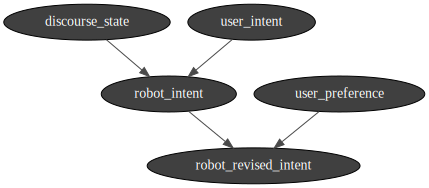

In [4]:
gnb.showBN(bn,size='20')

In [5]:
'''
Because as a user we tend ask more information from the 
intelligent system than for its opinion for now it might change in future.
'''
bn.cpt(user_intent).fillWith([0.8, 0.2])  
'''
Beacuse as per understanding the intelligent system as more accumulation of the knowledge and it 
uses it as base before answring a new topic
'''
bn.cpt(discourse_state).fillWith([0.6, 0.4])
'''
As a user, most prefers short answers rather than verbose
'''
bn.cpt(user_preference).fillWith([0.3, 0.7])

bn.cpt(robot_intent)[{'user_intent': 'info_req', 'discourse_state': 'prev_topic'}] = [0.3, 0.7]
bn.cpt(robot_intent)[{'user_intent': 'info_req', 'discourse_state': 'new_topic'}] = [0.4, 0.6]
bn.cpt(robot_intent)[{'user_intent': 'opinion_exp', 'discourse_state': 'prev_topic'}] = [0.4, 0.6]
bn.cpt(robot_intent)[{'user_intent': 'opinion_exp', 'discourse_state': 'new_topic'}] = [0.7, 0.3]

bn.cpt(robot_revised_intent)[{'robot_intent': 'acknowledge', 'user_preference': 'long_statement'}] = [0.1, 0.4, 0.2, 0.3]
bn.cpt(robot_revised_intent)[{'robot_intent': 'acknowledge', 'user_preference': 'short_statement'}] = [0.6, 0.1, 0.25, 0.05]
bn.cpt(robot_revised_intent)[{'robot_intent': 'provides_statement', 'user_preference': 'long_statement'}] = [0.2, 0.3, 0.1, 0.4]
bn.cpt(robot_revised_intent)[{'robot_intent': 'provides_statement', 'user_preference': 'short_statement'}] = [0.3, 0.1, 0.4, 0.2]

## Inference 

In [ ]:
ie=gum.LazyPropagation(bn)

## Infernce without evidence

In [ ]:
ie.makeInference()
ie.addJointTarget(set([user_intent,discourse_state,robot_intent,user_preference,robot_revised_intent]))
ie.jointPosterior(set([user_intent,discourse_state,robot_intent,user_preference,robot_revised_intent]))

## Inference with evidence

In [6]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'user_intent':'info_req', 'user_preference':'long_statement'})
ie.makeInference()
ie.posterior(robot_intent)

(pyAgrum.Potential<double>@0x1481780) 
  robot_intent     |
acknowled|provides_|
---------|---------|
 0.3400  | 0.6600  |

In [8]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({'user_intent':'info_req', 'user_preference':'long_statement', 'discourse_state':'new_topic'})
ie.makeInference()
ie.posterior(robot_intent)

(pyAgrum.Potential<double>@0x23547d0) 
  robot_intent     |
acknowled|provides_|
---------|---------|
 0.4000  | 0.6000  |

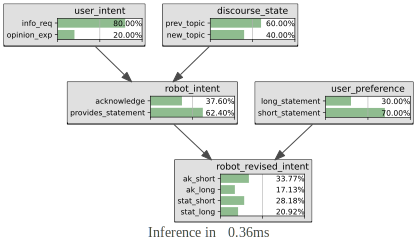

In [9]:
gnb.showInference(bn,evs={})